In [17]:
## Import Qiskit, and 

import numpy as np
from qiskit import Aer, QuantumCircuit, QuantumRegister, execute
from qiskit.visualization import plot_histogram
import cmath
import math
import matplotlib.pyplot as P
import matplotlib.pyplot as plt
from qiskit.tools.visualization import plot_bloch_multivector
from IPython.display import display, Math, Latex
from circle_plot import *
from qsphere_plotter import plot_state_qsphere
from widgets import minicomposer
from may4_challenge_common import return_state, vec_in_braket, statevec


# set up a Quantum register of 1 Qubit, call it "qr"
qr = QuantumRegister(1)

# set up a Quantum Circuit with the quantum register, call it "qcirc"
qcirc = QuantumCircuit(qr)


# Helper Funtion for Normalizing State Vectors
#
def normalize_state_Vector(state_vector):
    for result in state_vector:
        print("Normalized Result: " , round( np.abs(result)**2, 1) )
        
        
# Helper Funtion for print Polar Phase(s)
#      
def plot_polar(state_vector):
    pi_radians = 180;
    for x in state_vector:
        plt.polar([0,cmath.phase(x)],[0,abs(x)],marker='o')
        print("The original complex number Re{%d}, Im{%d}, and Length : %f" % (x.real, x.imag, abs(x)))
        print("Phase: ",cmath.phase(x))
        if cmath.phase(x) != 0:
            print("Angle: ", pi_radians/(np.pi/cmath.phase(x)))
    

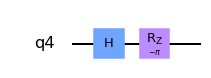

In [18]:
## Place the circuit in super position and execute a 180dg phase change gate on it.


### YOUR CODE BEGINS HERE:
                            ## QC Engine code : VIJAY TEWARI 
                            ##qc.reset(1);         // allocate one qubit
                            ##qc.write(0);         // write the value zero
                            ##qc.had();            // place it into superposition of 0 and 1
                            ##qc.phase(-180);
qcirc.h(qr[0])
qcirc.rz(-np.pi , qr[0]) ## Pass negative pi for -180 rotation : VIJAY TEWARI 
### YOUR CODE ENDS HERE.


# Draw the circuit
qcirc.draw(output='mpl')

In [19]:
from qiskit import BasicAer
backend_sv_sim = BasicAer.get_backend('statevector_simulator')

job_sim = execute(qcirc, backend_sv_sim)
result_sim = job_sim.result()
quantum_state = result_sim.get_statevector(qcirc, decimals=3)

# Output the quantum state vector (Amplitude of zero and one state respectively)
quantum_state

array([ 0.70710678+0.00000000e+00j, -0.70710678-8.65956056e-17j])

In [20]:
# Print out normalized statevector  (to gain probabilities)
#
normalize_state_Vector(quantum_state)

Normalized Result:  0.5
Normalized Result:  0.5


The original complex number Re{0}, Im{0}, and Length : 0.707107
Phase:  0.0
The original complex number Re{0}, Im{0}, and Length : 0.707107
Phase:  -3.141592653589793
Angle:  -180.0


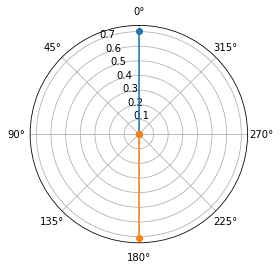

In [21]:
# Plot Polar Coordinates for intuitions sake - provides an idea of the angle of the plot on the curve
#VIJAY TEWARI
P.clf()
sp = P.subplot(1, 1, 1, projection='polar')
sp.set_theta_zero_location('N')
sp.set_theta_direction(1)

plot_polar(quantum_state)

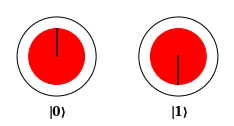

In [28]:
# Print out Circle Notation for intuitions sake

from circle_plot import *
plot_circles(quantum_state)

In [29]:
# Plot the state vector on a Bloch sphere

from qiskit.tools.visualization import plot_bloch_multivector
plot_bloch_multivector(quantum_state)

TypeError: '>' not supported between instances of 'int' and 'NoneType'

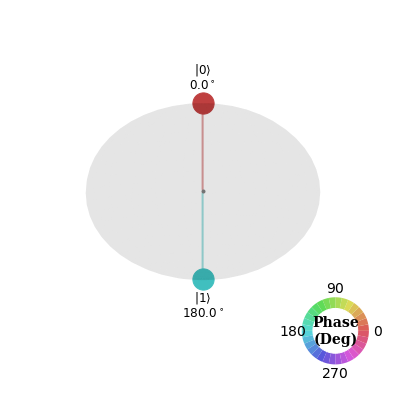

In [25]:
plot_state_qsphere(quantum_state, show_state_labels=True, show_state_angles=True) 